# 📌 Introduction

![image.png](attachment:ecafcddb-f01b-47ac-b38e-1cd964b2b971.png)

Waste is a significant global issue. Increasing volumes of waste are being generated as the global population and living standards rise. People are increasingly concerned about the production of waste and its effect, and are seeking ways to deal with the problem.

Recycling is the process of converting waste materials into new materials and objects. The recovery of energy from waste materials is often included in this concept. The recyclability of a material depends on its ability to reacquire the properties it had in its original state. It is an alternative to "conventional" waste disposal that can save material and help lower greenhouse gas emissions. Recycling can prevent the waste of potentially useful materials and reduce the consumption of fresh raw materials, thereby reducing: energy usage, air pollution (from incineration), and water pollution (from landfilling).

 **🟢 In this notebook, we will classify waste as organic or recyclable using Convolutional Neural Network (CNN).**

In [1]:
pip install google.colab

  Using cached google-colab-1.0.0.tar.gz (72 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached google_auth-1.4.2-py2.py3-none-any.whl (64 kB)
  Using cached ipykernel-4.6.1-py3-none-any.whl (104 kB)
  Using cached ipython-5.5.0-py3-none-any.whl (758 kB)
  Using cached notebook-5.2.2-py2.py3-none-any.whl (8.0 MB)
  Using cached six-1.12.0-py2.py3-none-any.whl (10 kB)
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend depend

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      error in pandas setup command: 'install_requires' must be a string or list of strings containing valid project/version requirement specifiers; Expected end or semicolon (after version specifier)
          pytz >= 2011k
               ~~~~~~~^
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/kaggle/input'):
        print(dirname)

In [ ]:
#train_path1 = "/kaggle/input/waste-classification-data/DATASET/TRAIN/"
train_pathL = "E:\PROJECT\PracticumPredective/a/DATASET/DATASET/TRAIN"
train_path="/content/drive/MyDrive/PracticumPredective/a/DATASET/DATASET/TRAIN"
#test_path1 = "/kaggle/input/waste-classification-data/DATASET/TEST/"
test_pathL="E:\PROJECT\PracticumPredective/a/DATASET/DATASET/TEST"
test_path="/content/drive/MyDrive/PracticumPredective/a/DATASET/DATASET/TRAIN"
test="E:\PROJECT\PracticumPredective\a\DATASET\DATASET\TEST"

train_path

'/content/drive/MyDrive/PracticumPredective/a/DATASET/DATASET/TRAIN'

## Import Libraries

In [ ]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from glob import glob

## Visualization

In [ ]:
x_data = [] 
y_data = [] 

for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 9975/9975 [02:34<00:00, 64.40it/s] 


In [ ]:
data.head

<bound method NDFrame.head of                                                    image label
0      [[[204, 142, 57], [204, 142, 57], [203, 143, 5...     O
1      [[[77, 77, 77], [76, 76, 76], [74, 74, 74], [8...     O
2      [[[228, 226, 247], [227, 225, 246], [207, 205,...     O
3      [[[210, 167, 213], [211, 168, 214], [212, 170,...     O
4      [[[176, 128, 108], [170, 122, 102], [156, 108,...     O
...                                                  ...   ...
22507  [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
22508  [[[63, 63, 63], [57, 57, 57], [76, 76, 76], [6...     R
22509  [[[54, 59, 3], [67, 72, 16], [82, 90, 33], [93...     R
22510  [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
22511  [[[17, 17, 17], [29, 29, 29], [12, 12, 12], [4...     R

[22512 rows x 2 columns]>

In [ ]:
data.shape

(22512, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'O': 12537, 'R': 9975})

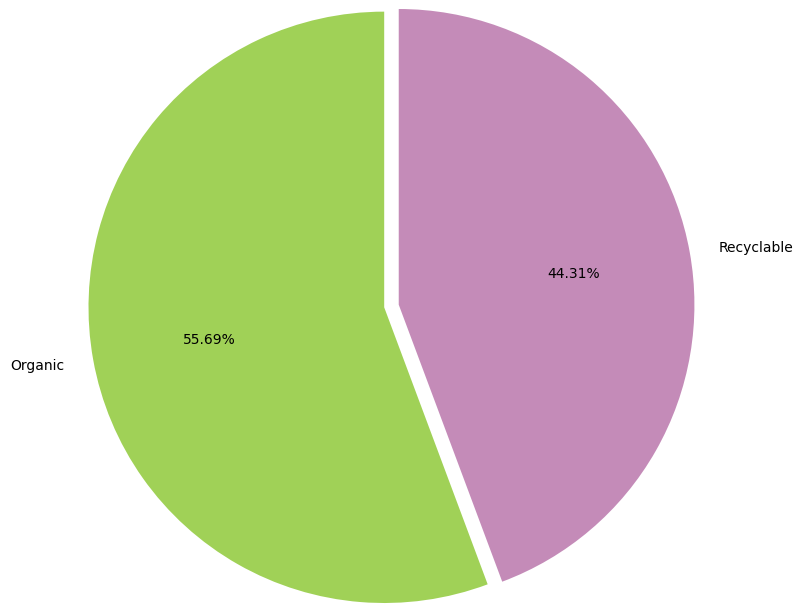

In [ ]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

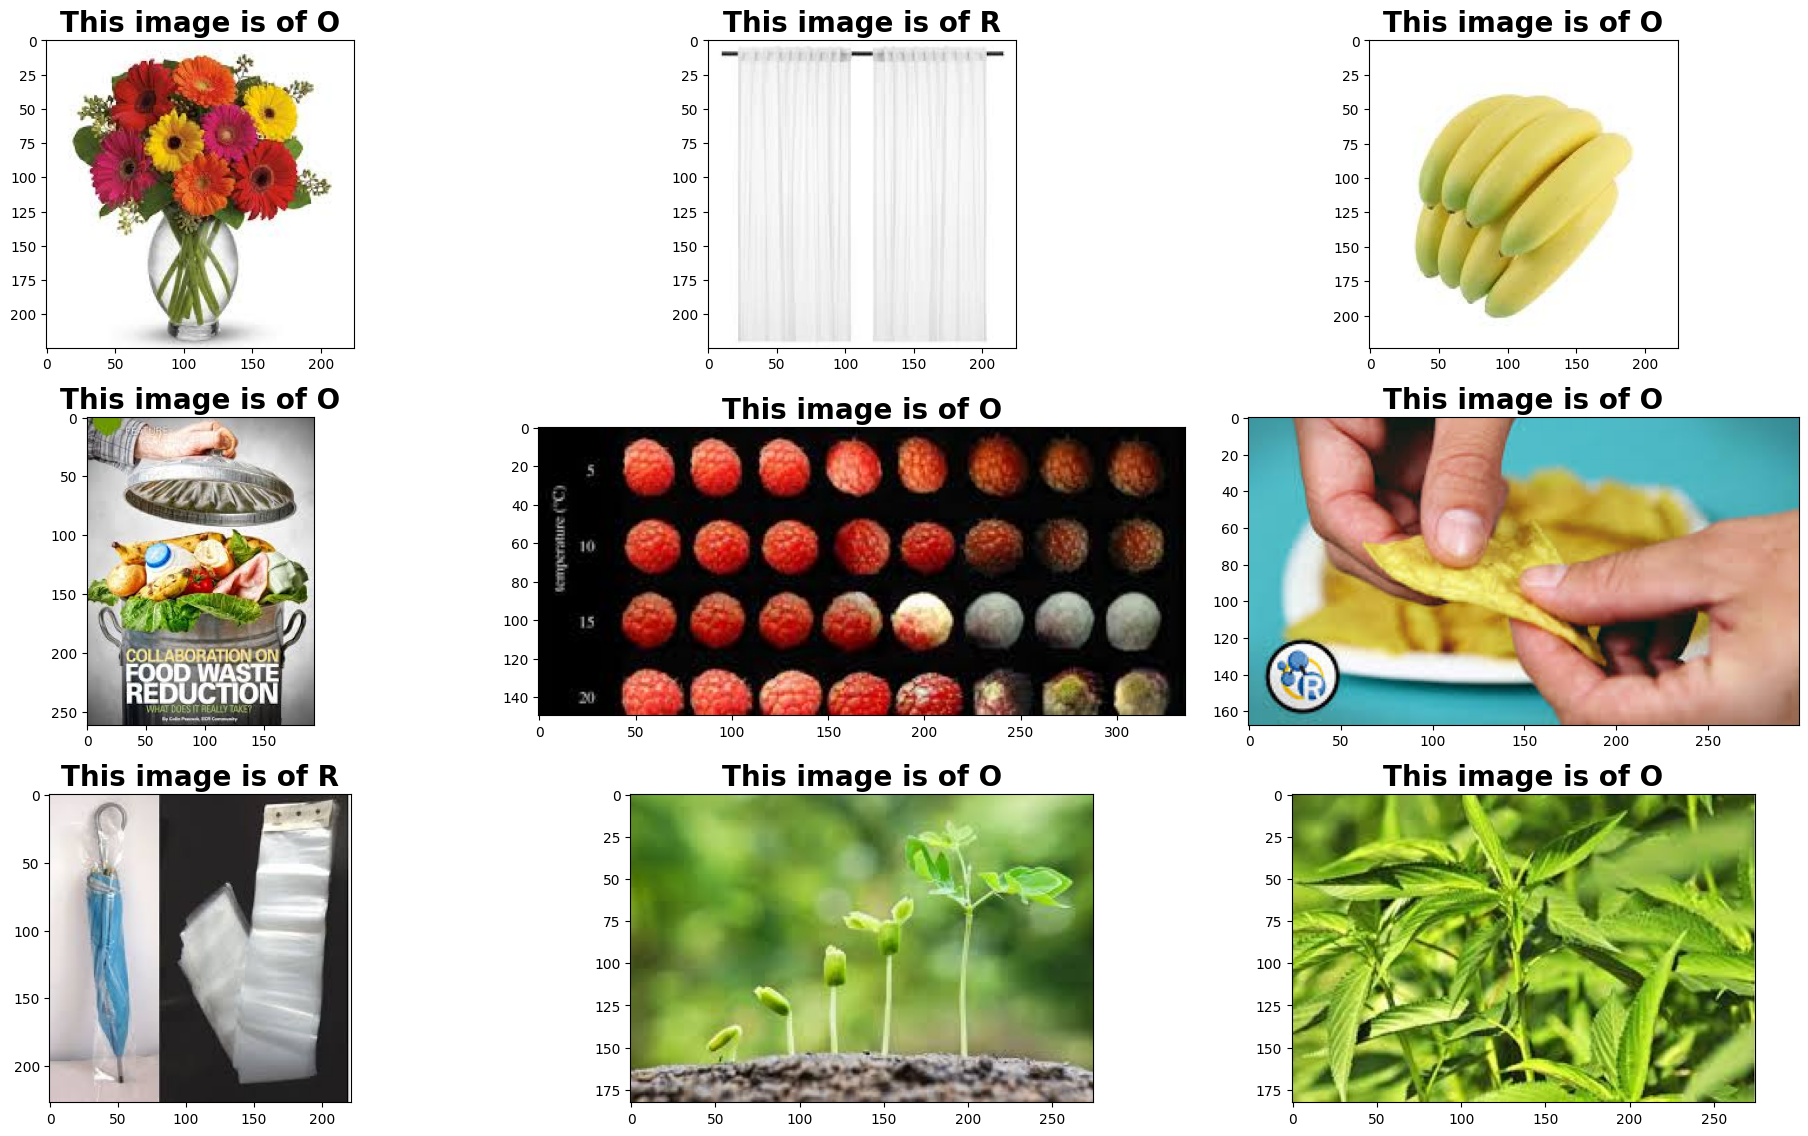

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

* O -> Organic
* R -> Recyclable

In [ ]:
# className = glob(train_path + '/*' )
# numberOfClass = len(className)
num=2
print("Number Of Class: ",num)

Number Of Class:  2


# Convolutional Neural Network - CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(num)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

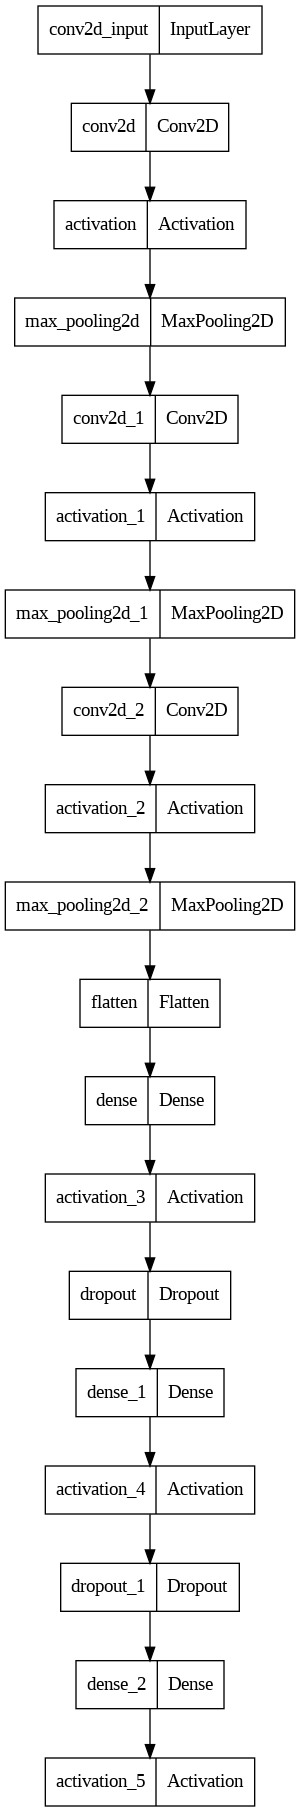

In [ ]:
plot_model(model)

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22512 images belonging to 2 classes.
Found 22512 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator)
hist.save("/content/drive/MyDrive/PracticumPredective/model.h5")

Epoch 1/10
88/88 [==============================] - 192s 2s/step - loss: 0.5293 - accuracy: 0.7609 - val_loss: 0.4238 - val_accuracy: 0.8105
Epoch 2/10
88/88 [==============================] - 165s 2s/step - loss: 0.4178 - accuracy: 0.8244 - val_loss: 0.3723 - val_accuracy: 0.8471
Epoch 3/10
88/88 [==============================] - 166s 2s/step - loss: 0.3799 - accuracy: 0.8443 - val_loss: 0.3519 - val_accuracy: 0.8467
Epoch 4/10
88/88 [==============================] - 165s 2s/step - loss: 0.3536 - accuracy: 0.8581 - val_loss: 0.3005 - val_accuracy: 0.8787
Epoch 5/10
88/88 [==============================] - 168s 2s/step - loss: 0.3156 - accuracy: 0.8757 - val_loss: 0.2721 - val_accuracy: 0.8893
Epoch 6/10
88/88 [==============================] - 169s 2s/step - loss: 0.2935 - accuracy: 0.8859 - val_loss: 0.2411 - val_accuracy: 0.9020
Epoch 7/10
88/88 [==============================] - 164s 2s/step - loss: 0.2686 - accuracy: 0.8942 - val_loss: 0.2287 - val_accuracy: 0.9064
Epoch 8/10
88

AttributeError: ignored

In [ ]:
hist.save("mod.h5")
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [ ]:
import pickle
with open('/content/drive/MyDrive/PracticumPredective/network11.h5', 'wb') as file_pi:
    pickle.dump(hist.history, file_pi)
with open('/content/drive/MyDrive/PracticumPredective/network11.h5', "rb") as file_pi:
    history = pickle.load(file_pi)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

## Model Prediction

In [ ]:
def predict_func(img): 
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

In [ ]:
test_img = cv2.imread("/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)

In [ ]:
test_img = cv2.imread("/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)